In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files
uploaded = files.upload()

Saving stock.csv to stock.csv


Index(['Stock Name', 'Symbol', 'Shares', 'Purchase Price', 'Cost Basis',
       'Current Price', 'Market Value', 'Gain/Loss', 'Dividend/share',
       'Annual Yield'],
      dtype='object')
Index(['Stock Name', 'Symbol', 'Shares', 'Purchase Price', 'Cost Basis',
       'Current Price', 'Market Value', 'Gain/Loss', 'Dividend/share',
       'Annual Yield'],
      dtype='object')


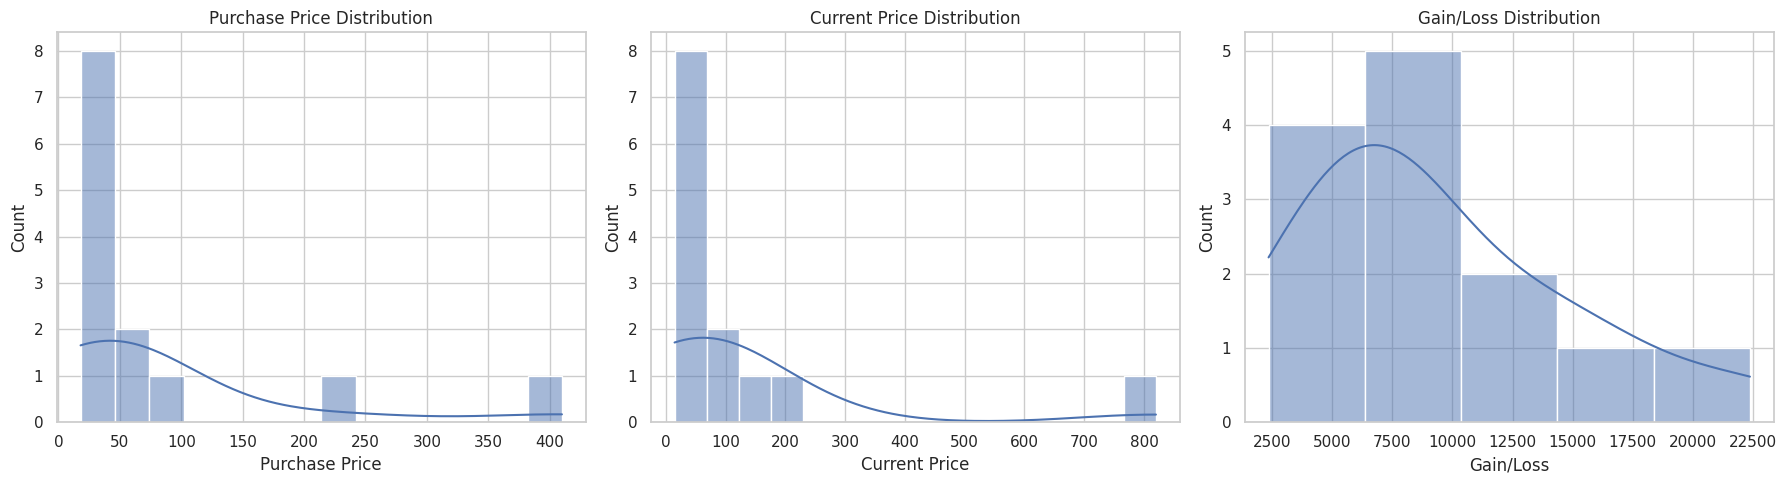

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#berisi unggahan file
df = pd.read_csv(list(uploaded.keys())[0], delimiter=';')

print(df.columns)


df.columns = df.columns.str.strip()

print(df.columns)

# Misalnya, membersihkan dan mengonversi kolom ke float jika diperlukan
df['Purchase Price'] = df['Purchase Price'].replace('[\$,]', '', regex=True).astype(float)
df['Current Price'] = df['Current Price'].replace('[\$,]', '', regex=True).astype(float)
df['Gain/Loss'] = df['Gain/Loss'].replace('[\$,]', '', regex=True).astype(float)

# Plot histogram menggunakan matplotlib dan seaborn
plt.figure(figsize=(18, 5))

# Plot Purchase Price distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Purchase Price'], kde=True)
plt.title('Purchase Price Distribution')

# Plot Current Price distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Current Price'], kde=True)
plt.title('Current Price Distribution')

# Plot Gain/Loss distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Gain/Loss'], kde=True)
plt.title('Gain/Loss Distribution')

# Adjust layout and display plot
plt.tight_layout()
plt.show()


In [3]:
import yfinance as yf
import pandas as pd

# Daftar simbol saham dari beberapa perusahaan
symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'JNJ', 'VZ', 'T', 'PG', 'KO']

# Mengambil data saham menggunakan yfinance
stocks = yf.Tickers(symbols)

data = []

for symbol in symbols:
    stock = stocks.tickers[symbol]
    info = stock.info
    # Mengambil dividen per saham jika tersedia, jika tidak tersedia gunakan 0
    dividend_per_share = info.get('dividendRate', 0)
    data.append([info['shortName'], info['symbol'], dividend_per_share])

# Membuat DataFrame untuk menampilkan data
df = pd.DataFrame(data, columns=['Stock Name', 'Symbol', 'Dividend Per Share'])
df = df.sort_values(by='Dividend Per Share', ascending=False)

# Menampilkan 5 saham dengan dividen per saham tertinggi
df.head(5)

,Stock Name,Symbol,Dividend Per Share
5,Johnson & Johnson,JNJ,4.96
8,Procter & Gamble Company (The),PG,4.03
1,Microsoft Corporation,MSFT,3.00
6,Verizon Communications Inc.,VZ,2.66
9,Coca-Cola Company (The),KO,1.94


In [4]:

import yfinance as yf
import pandas as pd

# Daftar simbol saham dari perusahaan dengan market value tertinggi
symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Mengambil data saham menggunakan yfinance
stocks = yf.Tickers(symbols)

data = []

for symbol in symbols:
    stock = stocks.tickers[symbol]
    info = stock.info
    data.append([info['shortName'], info['symbol'], info['marketCap']])

# Membuat DataFrame untuk menampilkan data
df = pd.DataFrame(data, columns=['Stock Name', 'Symbol', 'Market Value'])
df = df.sort_values(by='Market Value', ascending=False)

# Menampilkan data
df.head()

,Stock Name,Symbol,Market Value
1,Microsoft Corporation,MSFT,3465908846592
0,Apple Inc.,AAPL,3453086072832
2,Alphabet Inc.,GOOGL,2357294268416
3,"Amazon.com, Inc.",AMZN,2081111801856
4,"Tesla, Inc.",TSLA,784394551296


In [5]:

import yfinance as yf
import pandas as pd

# Daftar simbol saham dari beberapa perusahaan
symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'JNJ', 'VZ', 'T', 'PG', 'KO']

# Mengambil data saham menggunakan yfinance
stocks = yf.Tickers(symbols)

data = []

for symbol in symbols:
    stock = stocks.tickers[symbol]
    info = stock.info
    # Mengambil annual yield jika tersedia, jika tidak tersedia gunakan 0
    annual_yield = info.get('dividendYield', 0) * 100  # mengubah ke persentase
    data.append([info['shortName'], info['symbol'], annual_yield])

# Membuat DataFrame untuk menampilkan data
df = pd.DataFrame(data, columns=['Stock Name', 'Symbol', 'Annual Yield'])
df = df.sort_values(by='Annual Yield', ascending=False)

# Menampilkan 7 saham dengan annual yield tertinggi
df.head(7)

,Stock Name,Symbol,Annual Yield
6,Verizon Communications Inc.,VZ,6.47
7,AT&T Inc.,T,5.94
5,Johnson & Johnson,JNJ,3.40
9,Coca-Cola Company (The),KO,3.06
8,Procter & Gamble Company (The),PG,2.46
1,Microsoft Corporation,MSFT,0.65
0,Apple Inc.,AAPL,0.45
